In [106]:
import pandas as pd
import numpy as np
import pybaseball as pyb
import matplotlib.pyplot as plt
import seaborn as sns
pyb.cache.enable()

In [7]:
statcast_data = pyb.statcast(start_dt='2023-03-30', end_dt='2023-8-30')

This is a large query, it may take a moment to complete


100%|██████████| 154/154 [00:02<00:00, 58.92it/s]


### Goal: To see and understand how a starting MLB pitcher’s performance evolves over a 5 year period.

## Function that quiry Pitcher's information given name

In [103]:
features_to_keep_main = [
    'pitch_type', 
    'game_date', 
    'release_speed', 
    'release_pos_x', 
    'release_pos_z', 
    'player_name', 
    'events', 
    'zone', 
    'balls', 
    'strikes', 
    'game_year', 
    'pfx_x', 
    'pfx_z', 
    'plate_x', 
    'plate_z', 
    'outs_when_up', 
    'inning', 
    'inning_topbot', 
    'release_spin_rate', 
    'release_extension', 
    'delta_home_win_exp', 
    'delta_run_exp'
]

start_time_main = '2015-04-01'
end_time_main = '2020-07-15'


In [104]:
def get_pitchers_info(firstname, lastname, features_to_keep=features_to_keep_main, start_time=start_time_main, end_time=end_time_main):
    player_info = pyb.playerid_lookup(lastname, firstname)
    
    if player_info.empty:
        raise ValueError(f"No player found for name: {firstname} {lastname}")
    
    player_id = player_info['key_mlbam'].iloc[0]
    
    data = pyb.statcast_pitcher(start_time, end_time, player_id=player_id)
    filtered_data = data[features_to_keep]
    filtered_data = filtered_data.dropna()

    earlist = pd.to_datetime(sorted(filtered_data.game_date.unique())[0])
    latest = pd.to_datetime(sorted(filtered_data.game_date.unique())[-1])
    print(f'Loaded data for pitcher {firstname} {lastname} from {earlist} to {latest}')
    print(f'with {filtered_data.shape[0]} data points and {filtered_data.shape[1]} features')
    print()
    return filtered_data

In [105]:
firstname = 'patrick'
lastname = 'corbin'

pat_df = get_pitchers_info(firstname, lastname)

Gathering Player Data
Loaded data for pitcher patrick corbin from 2015-07-04 00:00:00 to 2019-10-30 00:00:00
with 3455 data points and 22 features



/Users/baohu/anaconda3/lib/python3.11/site-packages/pybaseball/utils.py:295: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(data.text))


In [112]:
def plot(columnName):
    pat_df['game_date'] = pd.to_datetime(pat_df['game_date'])


    pat_df['date_num'] = pat_df['game_date'].map(pd.Timestamp.toordinal)


    plt.figure(figsize=(10, 6))


    sns.regplot(x='date_num', y=columnName, data=pat_df, scatter_kws={'s': 10}, line_kws={'color': 'red'}, lowess=True)


    ax = plt.gca()
    ax.set_xticks(pat_df['date_num'][::len(pat_df)//6])  
    ax.set_xticklabels(pat_df['game_date'].dt.strftime("%Y-%m-%d")[::len(pat_df)//6], rotation=45)

    plt.xlabel('Date')
    plt.ylabel(columnName)
    # plt.title('Average ')

    plt.show()

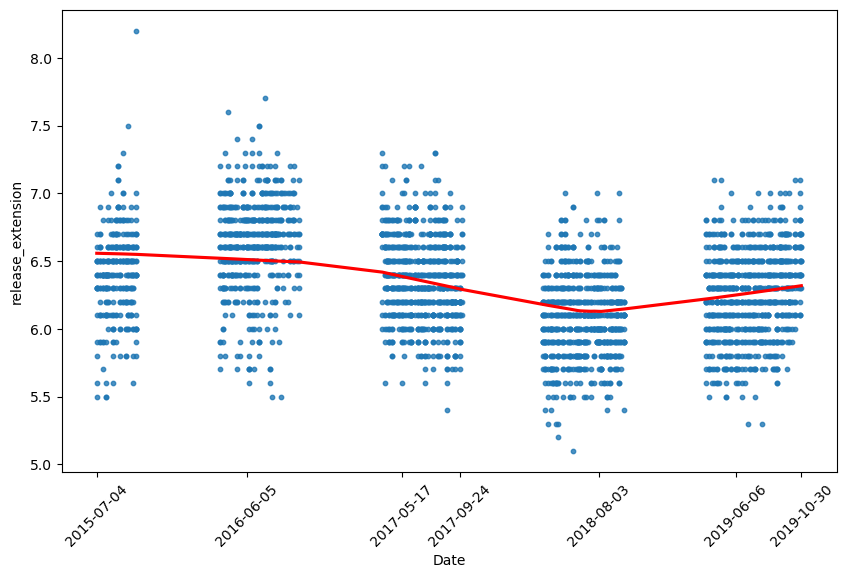

In [113]:
plot('release_extension')